In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [8]:
!ls '/content/drive/My Drive/2020/courses taken/AI -ML/daywise worklog/day46(16-07-2020)/all_stocks_5yr (1).csv'

'/content/drive/My Drive/2020/courses taken/AI -ML/daywise worklog/day46(16-07-2020)/all_stocks_5yr (1).csv'


In [9]:
# all_stocks_5yr.csv
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/2020/courses taken/AI -ML/daywise worklog/day46(16-07-2020)/all_stocks_5yr (1).csv')
data.shape

(619040, 7)

In [10]:
# Top Five rows
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [11]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [12]:
### How many company's data we have here?
data.Name.nunique()

505

In [13]:
## Selecting the data AAL
df = data[data['Name']=='AAL']
df.shape

(1259, 7)

In [14]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [15]:
#select the columns date and close price
df = df[['date','close']]
df

,date,close
0,2013-02-08,14.75
1,2013-02-11,14.46
2,2013-02-12,14.27
3,2013-02-13,14.66
4,2013-02-14,13.99
...,...,...
1254,2018-02-01,53.88
1255,2018-02-02,52.10
1256,2018-02-05,49.76
1257,2018-02-06,51.18


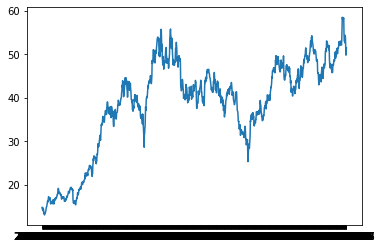

In [16]:
# Line plot
import matplotlib.pyplot as plt
plt.plot(df['date'],df['close'])

In [17]:
df.date[:10]

0    2013-02-08
1    2013-02-11
2    2013-02-12
3    2013-02-13
4    2013-02-14
5    2013-02-15
6    2013-02-19
7    2013-02-20
8    2013-02-21
9    2013-02-22
Name: date, dtype: object

In [18]:
### Missing values in the data
df.isnull().sum()

date     0
close    0
dtype: int64

In [20]:
# Preparing the data
## Features and target
## Input and output
## last 7 days data as input
## X -- [[d1-d7],[d9,d15],[d17,23]....]
## y -- [d8,d16,d24,...]

## X = [[d1-d7],[d2-d8],]
## y = [d8,d9]
X = [] ## input
y = [] ## ouput
for i  in range(df.shape[0]-7-1):   
  X.append(df['close'][i:i+7])# 0 -->[0:7], 1-->[1:8]
  y.append(df['close'][i+7])# 7,8,9
print(X[:2])


[0    14.75
1    14.46
2    14.27
3    14.66
4    13.99
5    14.50
6    14.26
Name: close, dtype: float64, 1    14.46
2    14.27
3    14.66
4    13.99
5    14.50
6    14.26
7    13.33
Name: close, dtype: float64]


In [21]:
import numpy as np
X = np.array(X)

In [22]:
df1  = pd.DataFrame(X,columns=['d1','d2','d3','d4','d5','d6','d7'])
df1.head()

,d1,d2,d3,d4,d5,d6,d7
0,14.75,14.46,14.27,14.66,13.99,14.50,14.26
1,14.46,14.27,14.66,13.99,14.50,14.26,13.33
2,14.27,14.66,13.99,14.50,14.26,13.33,13.37
3,14.66,13.99,14.50,14.26,13.33,13.37,13.57
4,13.99,14.50,14.26,13.33,13.37,13.57,13.02


In [23]:
df1['d8'] = y
df1.head()

,d1,d2,d3,d4,d5,d6,d7,d8
0,14.75,14.46,14.27,14.66,13.99,14.50,14.26,13.33
1,14.46,14.27,14.66,13.99,14.50,14.26,13.33,13.37
2,14.27,14.66,13.99,14.50,14.26,13.33,13.37,13.57
3,14.66,13.99,14.50,14.26,13.33,13.37,13.57,13.02
4,13.99,14.50,14.26,13.33,13.37,13.57,13.02,13.26


In [24]:
df1.shape

(1251, 8)

In [25]:
1251 * 0.8

1000.8000000000001

In [26]:
## Train test split
X_train = df1.iloc[0:1000,0:7]
X_test = df1.iloc[1000:,0:7]
y_train =  df1['d8'][:1000]
y_test  = df1['d8'][1000:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1000, 7)
(1000,)
(251, 7)
(251,)


In [27]:
## Sacling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = pd.DataFrame(sc.transform(X_train),columns = X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns = X_train.columns)
X_train_sc.describe()

,d1,d2,d3,d4,d5,d6,d7
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.107026e-17,1.179057e-16,3.196332e-16,8.437695e-18,-2.058353e-16,6.408207e-16,3.573808e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.119798e+00,-2.125939e+00,-2.132307e+00,-2.138824e+00,-2.145197e+00,-2.151939e+00,-2.158392e+00
25%,-5.582080e-01,-5.486430e-01,-5.493180e-01,-5.516601e-01,-5.450605e-01,-5.350756e-01,-5.332242e-01
50%,2.659776e-01,2.649882e-01,2.640589e-01,2.640761e-01,2.641178e-01,2.631759e-01,2.621305e-01
75%,6.620601e-01,6.644832e-01,6.649275e-01,6.633158e-01,6.633343e-01,6.668651e-01,6.666995e-01
max,1.847059e+00,1.847165e+00,1.847513e+00,1.847976e+00,1.848369e+00,1.848914e+00,1.849089e+00


In [28]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model = Sequential()
# 256 cels
model.add(LSTM(256,input_shape=(7,1)))
# single neuron
model.add(Dense(1))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='adam',loss='mse')

In [30]:
X_test.shape

(251, 7)

In [31]:
# number of records , time steps,Features
X_train_sc = X_train_sc.values.reshape(1000,7,1)
X_test_sc = X_test_sc.values.reshape(251,7,1)

In [32]:
history = model.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

Train on 1000 samples, validate on 251 samples
Epoch 1/100
1000/1000 [==============================] - 3s 3ms/step - loss: 993.4617 - val_loss: 540.1146
Epoch 2/100
1000/1000 [==============================] - 1s 794us/step - loss: 201.3625 - val_loss: 242.1736
Epoch 3/100
1000/1000 [==============================] - 1s 790us/step - loss: 115.6483 - val_loss: 176.4308
Epoch 4/100
1000/1000 [==============================] - 1s 846us/step - loss: 113.0723 - val_loss: 161.4357
Epoch 5/100
1000/1000 [==============================] - 1s 819us/step - loss: 112.9947 - val_loss: 158.6606
Epoch 6/100
1000/1000 [==============================] - 1s 822us/step - loss: 112.7743 - val_loss: 160.3580
Epoch 7/100
1000/1000 [==============================] - 1s 853us/step - loss: 112.3023 - val_loss: 163.3666
Epoch 8/100
1000/1000 [==============================] - 1s 866us/step - loss: 107.0003 - val_loss: 157.3922
Epoch 9/100
1000/1000 [==============================] - 1s 861us/step - loss: 41.5

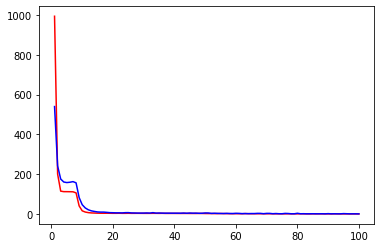

In [33]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')

In [34]:
model.predict(X_test_sc)

array([[45.288223],
       [45.513958],
       [45.988   ],
       [46.41098 ],
       [47.075214],
       [47.181923],
       [47.523354],
       [47.473465],
       [47.4289  ],
       [47.295166],
       [47.025543],
       [46.757675],
       [46.614346],
       [46.60175 ],
       [46.659256],
       [46.97241 ],
       [46.72785 ],
       [46.884464],
       [46.391808],
       [45.895386],
       [45.43749 ],
       [44.62906 ],
       [44.278637],
       [43.501366],
       [42.582603],
       [42.122498],
       [42.09245 ],
       [42.15237 ],
       [42.093517],
       [41.57107 ],
       [41.02453 ],
       [41.026096],
       [41.47921 ],
       [41.90727 ],
       [42.421535],
       [42.57011 ],
       [42.735348],
       [42.711555],
       [42.76829 ],
       [42.196136],
       [41.76891 ],
       [41.682667],
       [41.872875],
       [42.25202 ],
       [43.134884],
       [43.91787 ],
       [44.116226],
       [44.328983],
       [44.3077  ],
       [44.50901 ],


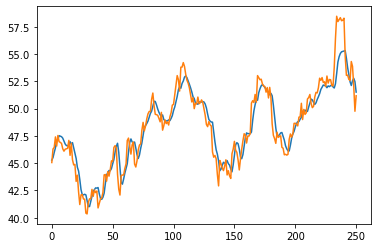

In [37]:
plt.plot(range(len(X_test_sc)),model.predict(X_test_sc).flat)
plt.plot(range(len(X_test_sc)),y_test)

In [38]:
X_test_sc[0].reshape(1,7,1)

array([[[0.83910218],
        [0.77719701],
        [0.75711333],
        [0.75193205],
        [0.7682191 ],
        [0.86976278],
        [0.85612661]]])

In [39]:
model.predict(X_test_sc[0].reshape(1,7,1))

array([[45.28823]], dtype=float32)

In [40]:
y_test[1000]

45.06

In [42]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model2 = Sequential()
# 256 cels
model2.add(LSTM(256,input_shape=(7,1)))
model2.add(Dropout(0.3))
# single neuron
model2.add(Dense(1))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [43]:
model2.compile(optimizer='adam',loss='mse')

In [44]:
history2 = model2.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

Train on 1000 samples, validate on 251 samples
Epoch 1/100
1000/1000 [==============================] - 1s 1ms/step - loss: 982.4433 - val_loss: 556.4161
Epoch 2/100
1000/1000 [==============================] - 1s 858us/step - loss: 205.5111 - val_loss: 250.7751
Epoch 3/100
1000/1000 [==============================] - 1s 863us/step - loss: 70.7319 - val_loss: 136.1709
Epoch 4/100
1000/1000 [==============================] - 1s 799us/step - loss: 34.2405 - val_loss: 86.3107
Epoch 5/100
1000/1000 [==============================] - 1s 816us/step - loss: 24.1345 - val_loss: 66.1940
Epoch 6/100
1000/1000 [==============================] - 1s 868us/step - loss: 17.5063 - val_loss: 45.6091
Epoch 7/100
1000/1000 [==============================] - 1s 836us/step - loss: 13.9669 - val_loss: 34.5760
Epoch 8/100
1000/1000 [==============================] - 1s 850us/step - loss: 11.2030 - val_loss: 26.2758
Epoch 9/100
1000/1000 [==============================] - 1s 791us/step - loss: 10.1190 - val_l

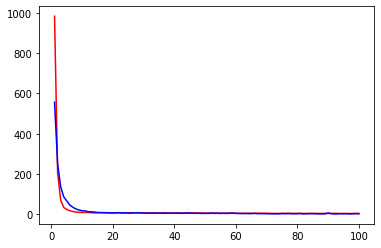

In [45]:
tr_loss = history2.history['loss']
val_loss = history2.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')

- Get the data
- what is the target
- Take the target and observe downtrend or uptrend
- Create input(features) and ouputs(target)
- Train_test_split
- Apply scaling if it required
- Reshape the inputs
- Create a Model
- Compile the model with the proper optimizer and loss
- Metrics =['mse','mae']
- Evaluate the model with test data
- compare the results
- Check for overfitting and underfitting
- If It is an overfitted model apply dropout. or check another model